In [50]:
%matplotlib inline

In [82]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
import math

In [161]:
class Body(plt.Circle):

    G = 0.002
    def __init__(self, x,y,mass,radius = 0.2,color='green'):
        self.x = x
        self.y = y
        self.mass = mass
        self.body = plt.Circle((self.x,self.y), radius = radius,color = color)
        self.velocity = np.array([0,0])
    
    @staticmethod
    def calc_acceleration(m,r):
        return Body.G * m/r**2

    @staticmethod
    def distance(point1,point2):
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    
    @staticmethod
    def first_derivative(m,r):
        return 2 * Body.G * m/ r **3
    
    
circleA = Body(0,0,200,radius= 0.3)
# circleA.velocity = np.array([0,0])
circleB = Body(3,3, 5, radius= 0.1,color='red')
# circleB.velocity = np.array([0,0])
dist = circleA.distance([circleA.x, circleA.y], [circleB.x, circleB.y])
print(f'Acceleration: {circleA.calc_acceleration(circleA.mass, dist)} Distance: {dist} First derivative:\
      {circleA.first_derivative(circleA.mass, dist)}')

fig = plt.figure(figsize= (7,7))
ax = fig.add_subplot(111)
ax.add_artist(circleA.body)
ax.add_artist(circleB.body)

lines = plt.plot([])
line = lines[0]


plt.xlim(-10,10)
plt.ylim(-10,10)

def animate(frame):
    dist = circleA.distance([circleA.x, circleA.y], [circleB.x, circleB.y])
    acceleration = circleA.calc_acceleration(circleA.mass, dist)
    first_deriv = circleA.first_derivative(circleA.mass, dist)
    dist_vector_BA = [circleA.x - circleB.x, circleA.y - circleB.y]
    velocity_vector_BA = np.array([dist_vector_BA[0] * first_deriv, dist_vector_BA[1] * first_deriv])

    
    circleB.velocity = circleB.velocity + velocity_vector_BA

    circleA.x+=circleA.velocity[0]
    circleA.y = circleA.x ** 2
    circleB.x += velocity_vector_BA[0]
    circleB.y += velocity_vector_BA[1]
    circleA.body.center = (circleA.x, circleA.y)
    circleB.body.center = (circleB.x, circleB.y)
    line.set_data((circleA.x,circleA.y))
    line.set_data((circleB.x, circleB.y))
    
    
anim = FuncAnimation(fig, animate,frames=200, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

Acceleration: 0.022222222222222227 Distance: 4.242640687119285 First derivative:      0.010475656017578485


4.242640687119285
[0 0]
[3 3]
[-3 -3]
Result vector: 
    Specialized PolyCollection for arrows.

    The only API method is set_UVC(), which can be used
    to change the size, orientation, and color of the
    arrows; their locations are fixed when the class is
    instantiated.  Possibly this method will be useful
    in animations.

    Much of the work in this class is done in the draw()
    method so that as much information as possible is available
    about the plot.  In subsequent draw() calls, recalculation
    is limited to things that might have changed, so there
    should be no performance penalty from putting the calculations
    in the draw() method.
    


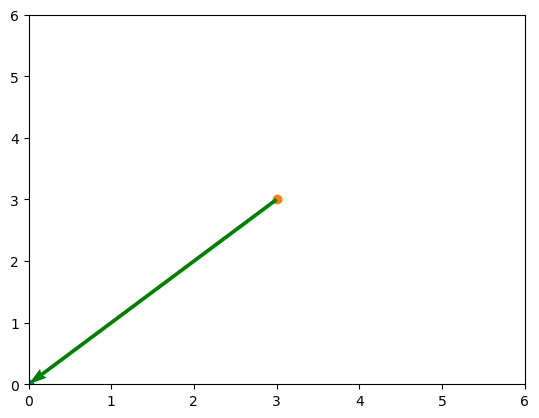

In [138]:
def calc_distance(v1,v2):
    return math.sqrt((v1[0] - v2[0]) **2 + (v1[1] - v2[1])**2)

A = np.array([0,0])
B = np.array([3,3])
d = circleA.distance(A,B)
print(d)
print(A)
print(B)
print(A+(-1)* B)
plt.xlim(0,6)
plt.ylim(0,6)
plt.scatter(0,0)
plt.scatter(3,3)
result = plt.quiver(3,3,-3,-3, angles = "xy", scale_units = "xy", scale = 1, color = 'green')
print(f'Result vector: {result.__doc__}')
# plt.quiver(0,0,1,1, angles = "xy", scale_units = "xy", scale = 1, color = 'red')
# plt.quiver(0,0,3,3, angles = "xy", scale_units = "xy", scale = 1, color = 'blue')

plt.show()


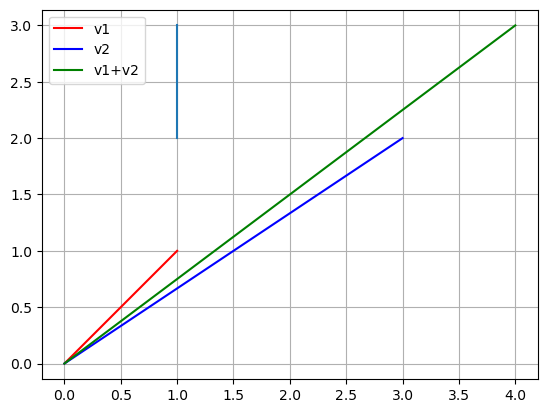

In [80]:
# Векторите
v1 = np.array([1, 1])
v2 = np.array([3, 2])

# Изчисляване на сумата
v_sum = v1 + v2

# Начертаване на графиката
plt.figure()
plt.plot([0, v1[0]], [0, v1[1]], '-r', label='v1') # Червената линия е v1
plt.plot([0, v2[0]], [0, v2[1]], '-b', label='v2') # Синята линия е v2
plt.plot([0, v_sum[0]], [0, v_sum[1]], '-g', label='v1+v2') # Зелената линия е v1+v2
plt.plot([1,1], [3,2])
plt.legend(loc='upper left')
plt.axis('equal')
plt.grid()
plt.show()